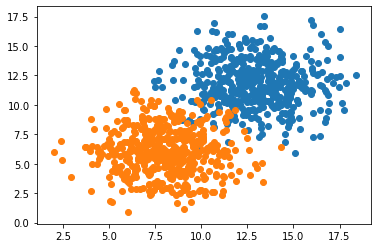

In [38]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
# Stochastic gradient descent optimization method utilizing Adagrad + RMSprop
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
                np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
                np.random.normal(6, 2, n_pts)]).T
     
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
     
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [39]:
model = Sequential()
# in a dense layer, every node is connected to the next layer
# Specify properties, the units = 1 since we have 1 ouput node
# specify input nodes. as demonstratd in our previous example we only have x1,x2
# activation function in which case we use sigmoid
model.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))
# prompts the adam optimization method with a learning rate of 0.1
adam = Adam(lr=0.1)
# what type of optimizer, error function (cross entropy), the metric used to judge performance of model
model.compile(adam, loss= 'binary_crossentropy', metrics = ['accuracy'])
h = model.fit(x=X, y=y, verbose = 1, batch_size = 50, epochs = 500, shuffle = 'true')

Epoch 1/500
1000/1000 [==============================] - 0s 211us/step - loss: 4.9528 - accuracy: 0.5160
Epoch 2/500
1000/1000 [==============================] - 0s 20us/step - loss: 1.2752 - accuracy: 0.4860
Epoch 3/500
1000/1000 [==============================] - 0s 19us/step - loss: 0.6880 - accuracy: 0.5780
Epoch 4/500
1000/1000 [==============================] - 0s 20us/step - loss: 0.5392 - accuracy: 0.7270
Epoch 5/500
1000/1000 [==============================] - 0s 19us/step - loss: 0.4742 - accuracy: 0.8100
Epoch 6/500
1000/1000 [==============================] - 0s 20us/step - loss: 0.4214 - accuracy: 0.8580
Epoch 7/500
1000/1000 [==============================] - 0s 19us/step - loss: 0.3864 - accuracy: 0.8800
Epoch 8/500
1000/1000 [==============================] - 0s 19us/step - loss: 0.3449 - accuracy: 0.9030
Epoch 9/500
1000/1000 [==============================] - 0s 20us/step - loss: 0.3071 - accuracy: 0.9260
Epoch 10/500
1000/1000 [==============================] - 0s 20

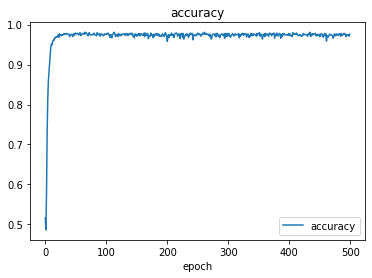

In [40]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

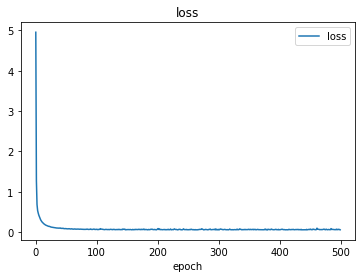

In [41]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [46]:
def plot_decision_boundary(X,y,model):
    x_span = np.linspace(min(X[:,0]) - 1,max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx,yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel() , yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)


Prediction is: [[0.9999851]]


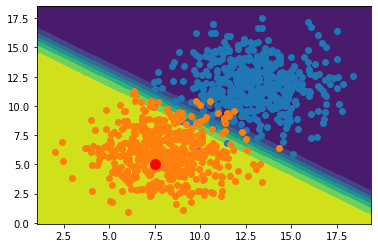

In [50]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

x,y = 7.5, 5

point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot ([x], [y], marker = 'o', markersize = 10, color = 'red')
print ("Prediction is:", prediction)